In this notebook, we are going to load stock prices for the S&P 500 and its constituents from the last 10 years. We will be using this data quite a bit for the rest of our Alpha Research work, so it's super important!

## Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install fix-yahoo-finance==0.1.30
!pip install yfinance
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64

In [ ]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import yfinance as yf

import datetime as dt
import sys
import json
from pathlib import Path

import webbrowser
from selenium import webdriver

In [ ]:
sys.path.insert(0, 'usr/lib/chromium-browser/chromedriver')

## Scrape list of S&P 500 Constituents

We can scrape this from the wikipedia list page!

In [ ]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(wiki_url, header=0)[0]
sp500_constituents.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
sp500_constituents['Symbol'] = [i.replace('.', '-') for i in sp500_constituents['Symbol']]

The DataFrame already has a column containing all of the stock symbols, so we can just pull the price data from Yahoo! Finance.

## Get Current S&P 500 Constituent Price Data since 2009

In [ ]:
start = dt.datetime(2009,1,1)
end = dt.datetime(2021,8,1)
price_dict = {}
for symbol in sp500_constituents['Symbol']:
  price_dict[symbol] = yf.Ticker(symbol).history(start=start, end=end)

In [ ]:
price_dict

{'A':                   Open        High  ...  Dividends  Stock Splits
 Date                                ...                         
 2009-01-02   10.210934   10.669118  ...        0.0           0.0
 2009-01-05   10.551301   11.186213  ...        0.0           0.0
 2009-01-06   11.192760   12.246580  ...        0.0           0.0
 2009-01-07   11.683667   12.082941  ...        0.0           0.0
 2009-01-08   11.886576   12.096031  ...        0.0           0.0
 ...                ...         ...  ...        ...           ...
 2021-07-26  151.729996  152.169998  ...        0.0           0.0
 2021-07-27  149.289993  150.000000  ...        0.0           0.0
 2021-07-28  150.000000  151.970001  ...        0.0           0.0
 2021-07-29  151.990005  153.460007  ...        0.0           0.0
 2021-07-30  152.520004  153.600006  ...        0.0           0.0
 
 [3166 rows x 7 columns],
 'AAL':                  Open       High        Low  ...    Volume  Dividends  Stock Splits
 Date            

In [ ]:
price_dict['BBWI']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-01-02,3.855456,4.102601,3.821236,4.079788,3766912,0.0,0
2009-01-05,4.068382,4.243284,3.954315,4.167240,7949086,0.0,0
2009-01-06,4.224273,4.258492,4.098799,4.171041,7058817,0.0,0
2009-01-07,4.102601,4.193855,3.984732,4.068381,7792976,0.0,0
2009-01-08,3.840247,3.885874,3.665345,3.802225,10653786,0.0,0
...,...,...,...,...,...,...,...
2021-07-26,63.055779,63.597412,61.915928,62.619240,3088789,0.0,0
2021-07-27,61.592564,62.708164,60.695229,62.675831,5058588,0.0,0
2021-07-28,62.877930,63.233631,61.738075,62.594990,3401255,0.0,0


In [ ]:
#attempt to make one big dataframe
sp500_df = price_dict['MMM']
sp500_df['ticker'] = 'MMM'
for ticker in list(price_dict.keys())[1:]:
  temp = price_dict[ticker]
  temp['ticker'] = ticker
  sp500_df = pd.concat([sp500_df, temp])

In [ ]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1521858 entries, 2009-01-02 to 2021-07-30
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Open          1521853 non-null  float64
 1   High          1521853 non-null  float64
 2   Low           1521853 non-null  float64
 3   Close         1521853 non-null  float64
 4   Volume        1521853 non-null  float64
 5   Dividends     1521858 non-null  float64
 6   Stock Splits  1521858 non-null  float64
 7   ticker        1521858 non-null  object 
dtypes: float64(7), object(1)
memory usage: 104.5+ MB


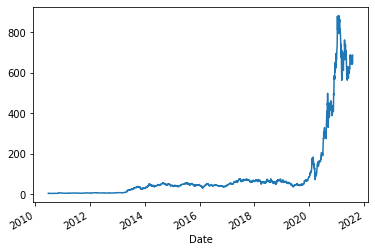

In [ ]:
sp500_df.loc[sp500_df['ticker'] == 'TSLA', 'Close'].plot()

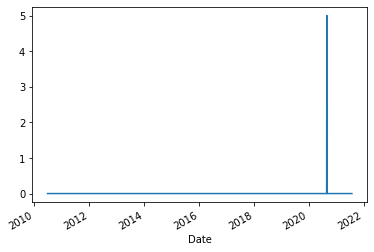

In [ ]:
sp500_df.loc[sp500_df['ticker'] == 'TSLA', 'Stock Splits'].plot()

In [ ]:
#save big price dataframe
DATA_STORE = Path('asset_data.h5')
with pd.HDFStore(DATA_STORE) as store:
  store.put('sp500_prices', sp500_df)

## Get S&P 500 Index Data Since 2009

In [ ]:
historical_sp500 = pd.read_csv('https://stooq.com/q/d/l/?s=^spx&i=d')

In [ ]:
historical_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38500 entries, 0 to 38499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    38500 non-null  object 
 1   Open    38500 non-null  float64
 2   High    38500 non-null  float64
 3   Low     38500 non-null  float64
 4   Close   38500 non-null  float64
 5   Volume  18103 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.8+ MB


In [ ]:
print(historical_sp500.head())
print(historical_sp500.tail())

         Date  Open  High   Low  Close  Volume
0  1789-05-01  0.51  0.51  0.51   0.51     NaN
1  1789-06-01  0.51  0.51  0.51   0.51     NaN
2  1789-07-01  0.50  0.50  0.50   0.50     NaN
3  1789-08-01  0.50  0.51  0.50   0.51     NaN
4  1789-09-01  0.51  0.51  0.50   0.51     NaN
             Date     Open     High      Low    Close        Volume
38495  2021-08-02  4406.86  4422.18  4384.81  4387.16  1.983437e+09
38496  2021-08-03  4392.74  4423.79  4373.00  4423.15  2.174965e+09
38497  2021-08-04  4415.95  4416.17  4400.23  4402.66  2.331476e+09
38498  2021-08-05  4408.86  4429.76  4408.86  4429.10  1.960628e+09
38499  2021-08-06  4429.07  4440.82  4429.07  4436.52  1.838165e+09


In [ ]:
with pd.HDFStore(DATA_STORE) as store:
  store.put('historical_sp500', historical_sp500)

## Getting .csv Files from NASDAQ Stock Screener

In [ ]:
""" FIX THIS LATER
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

exchanges = ['NASDAQ', 'NYSE', 'AMEX']
for ex in exchanges:
  driver.get('https://www.nasdaq.com/market-activity/stocks/screener?exchange='+ ex + '&letter=0&render=download')
  driver.implicitly_wait(20)
  button = driver.find_element_by_xpath("/html/body/div[2]/div/main/div[2]/article/div[3]/div[1]/div/div/div[3]/div[2]/div[2]/div/button")
  button.click()
  """

' FIX THIS LATER\nchrome_options = webdriver.ChromeOptions()\nchrome_options.add_argument(\'--headless\')\nchrome_options.add_argument(\'--no-sandbox\')\nchrome_options.add_argument(\'--disable-dev-shm-usage\')\ndriver = webdriver.Chrome(\'chromedriver\',chrome_options=chrome_options)\n\nexchanges = [\'NASDAQ\', \'NYSE\', \'AMEX\']\nfor ex in exchanges:\n  driver.get(\'https://www.nasdaq.com/market-activity/stocks/screener?exchange=\'+ ex + \'&letter=0&render=download\')\n  driver.implicitly_wait(20)\n  button = driver.find_element_by_xpath("/html/body/div[2]/div/main/div[2]/article/div[3]/div[1]/div/div/div[3]/div[2]/div[2]/div/button")\n  button.click()\n  '

In [ ]:
exchanges = ['nasdaq', 'nyse', 'amex']
meta_df = pd.read_csv('nasdaq_metadata.csv')
for ex in exchanges[1:]:
  temp = pd.read_csv(ex + '_metadata.csv')
  meta_df = pd.concat([meta_df, temp])

In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7840 entries, 0 to 280
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      7840 non-null   object 
 1   Name        7840 non-null   object 
 2   Last Sale   7840 non-null   object 
 3   Net Change  7840 non-null   float64
 4   % Change    7840 non-null   object 
 5   Market Cap  7343 non-null   float64
 6   Country     7157 non-null   object 
 7   IPO Year    4534 non-null   float64
 8   Volume      7840 non-null   int64  
 9   Sector      6983 non-null   object 
 10  Industry    6982 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 735.0+ KB


In [ ]:
meta_df_keep = meta_df[['Symbol', 'Last Sale', 'Market Cap', 'IPO Year', 'Sector', 'Industry']].copy()
meta_df_keep.columns = meta_df_keep.columns.str.lower()
meta_df_keep.columns = meta_df_keep.columns.str.replace(' ','')
meta_df_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7840 entries, 0 to 280
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     7840 non-null   object 
 1   lastsale   7840 non-null   object 
 2   marketcap  7343 non-null   float64
 3   ipoyear    4534 non-null   float64
 4   sector     6983 non-null   object 
 5   industry   6982 non-null   object 
dtypes: float64(2), object(4)
memory usage: 428.8+ KB


In [ ]:
meta_df_keep.head()

,symbol,lastsale,marketcap,ipoyear,sector,industry
0,AACG,$2.86,9.066540e+07,NaN,Miscellaneous,Service to the Health Industry
1,AAL,$20.56,1.331173e+10,NaN,Transportation,Air Freight/Delivery Services
2,AAME,$4.49,9.166686e+07,NaN,Finance,Life Insurance
3,AAOI,$7.52,2.020029e+08,2013.0,Technology,Semiconductors
4,AAON,$68.55,3.592276e+09,NaN,Capital Goods,Industrial Machinery/Components


In [ ]:
meta_df_keep.dtypes

symbol        object
lastsale      object
marketcap    float64
ipoyear      float64
sector        object
industry      object
dtype: object

In [ ]:
# change lastsale to float
meta_df_keep['lastsale'] = meta_df_keep['lastsale'].str.replace('$','').astype(float)

In [ ]:
#change ipoyear to string
meta_df_keep['ipoyear'] = [str(0) if np.isnan(i) else str(int(i)) for i in meta_df_keep['ipoyear']]

In [ ]:
meta_df_keep = meta_df_keep.reset_index(drop=True)
meta_df_keep

,symbol,lastsale,marketcap,ipoyear,sector,industry
0,AACG,2.86,9.066540e+07,0,Miscellaneous,Service to the Health Industry
1,AAL,20.56,1.331173e+10,0,Transportation,Air Freight/Delivery Services
2,AAME,4.49,9.166686e+07,0,Finance,Life Insurance
3,AAOI,7.52,2.020029e+08,2013,Technology,Semiconductors
4,AAON,68.55,3.592276e+09,0,Capital Goods,Industrial Machinery/Components
...,...,...,...,...,...,...
7835,XXII,3.67,5.972392e+08,0,Consumer Non-Durables,Farming/Seeds/Milling
7836,YCBD,2.31,1.315951e+08,2017,Consumer Non-Durables,Package Goods/Cosmetics
7837,YCBD^A,7.02,NaN,0,NaN,NaN
7838,ZDGE,16.95,2.404619e+08,2016,Technology,Computer Software: Prepackaged Software


In [ ]:
with pd.HDFStore(DATA_STORE) as store:
  store.put('stock_metadata', meta_df_keep)

In [132]:
DATA_STORE.stat().st_size / (1024 * 1024 * 1024)

0.10129417479038239

In [133]:
from google.colab import files
files.download('asset_data.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>